(rootfind)=
# Using a rootfinder to solve implicit equations

We'll need this to solve equations like finding the lifting condensation level where the dewpoint=temperature

Documentation is here [scipy.optimize.brentq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html)

## The cell below shows how to use a rootfinder to solve the equation

$$
cos(x) - 0.75 = 0
$$

The algorithm evaluates the function for increasing values of x until in sees a sign change.  It then backtracks to the other side of the sign change and starts increaing x again until it sees the sign change.  It will stop when the change in x is below a selected tolerance

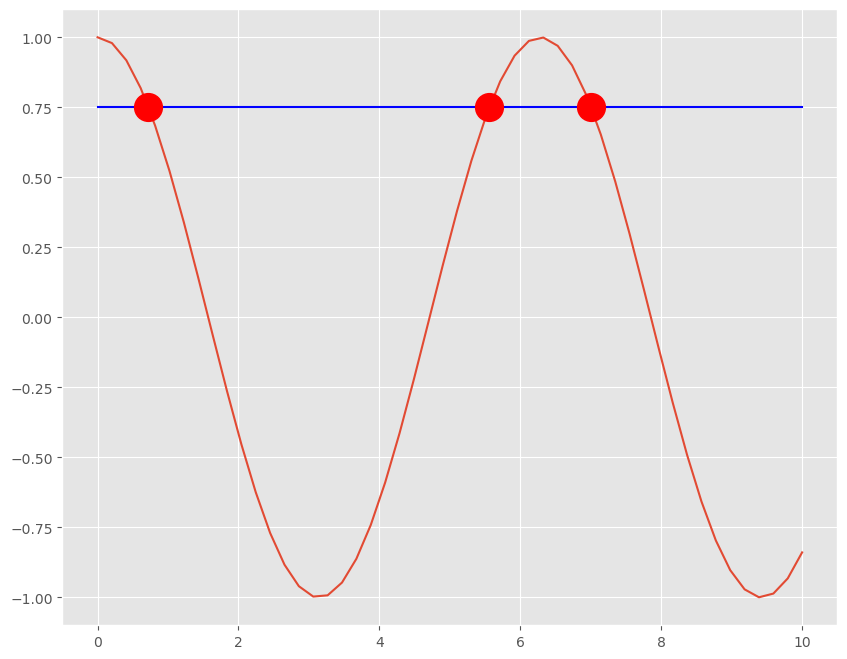

In [1]:
from scipy import optimize
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('ggplot')


xvals=np.linspace(0,10.)
fig,ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(xvals,np.cos(xvals))
straight_line=np.ones_like(xvals)
ax.plot(xvals,straight_line*0.75,'b-')

def root_function(x):
    """Function we want to find the root of
       input: x value
       output: y value -- should be zero when x is a root
    """
    return np.cos(x) - 0.75

root1 = optimize.brentq(root_function,0,2)
root2 = optimize.brentq(root_function,4,6)
root3 = optimize.brentq(root_function,6,8)
xvals=np.array([root1,root2,root3])
yvals=np.cos(xvals)
ax.plot(xvals,yvals,'ro',markersize=20);

## Apply to the Clausius-Clapyron equation

Given an the Clausius Clapyron equation and a saturation vapor pressure in $es$ in Pa, find the dewpoint temperature in Kelvin, i.e. the teperature where:

es = find_esat(Tdewpoint)

In [2]:
def find_esat(temp):
    #
    # curve fit to the cC equation
    # 
    Tc = temp - 273.15
    esatOut = 611.2 * np.exp(17.67 * Tc / (Tc + 243.5))
    return esatOut

In [3]:
def root_function(tdew, the_es):
    #
    # find tdew where the_es = esat_guess
    #
    esat_guess = find_esat(tdew)
    zero_val = the_es - esat_guess
    print(f"{esat_guess=:5.3f}")
    return zero_val

In [4]:
the_es = 1917 # Pa
the_dew = optimize.brentq(root_function,250,330,args=(the_es,))
print(f"{the_dew=:5.3f} K")

esat_guess=95.489
esat_guess=17326.411
esat_guess=196.513
esat_guess=2497.786
esat_guess=1406.220
esat_guess=1849.108
esat_guess=1918.586
esat_guess=1916.975
esat_guess=1917.000
esat_guess=1917.000
esat_guess=1917.000
the_dew=289.992 K


### Chect the answer

Use [find_esat](https://phaustin.github.io/a405_lib/full_listing.html#a405.thermo.thermlib.find_esat) from the a405 thermo library to check that your dewpoint temperature produces the correct vapor press.

In [5]:
from a405.thermo import thermlib as tl
help(tl.find_esat)

Help on function find_esat in module a405.thermo.thermlib:

find_esat(temp)
    Calculates the saturation water vapor pressure over a flat
    surface of water at temperature 'temp'.
    
    Parameters
    ----------
    
    temp : float or array_like
           Temperature of parcel (K).
    
    Returns
    -------
    
    esatOut : float or list
        Saturation water vapour pressure (Pa).
    
    Examples
    --------
    
    >>> find_esat(300.)
    3534.5196668891358
    >>> find_esat([300., 310.])
    array([ 3534.5197,  6235.5322])
    
    References
    ----------
    Emanuel 4.4.14 p. 117

